In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Downloads\loan_data_2007_2014 (3).csv")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_dat = df.copy()
loan_dat.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
print("Database dimension :" ,loan_dat.shape)
print("Databse size :" ,loan_dat.size)
print("Number of row :",len(loan_dat.index))
print("Number of columns :",len(loan_dat.columns))

Database dimension : (466285, 75)
Databse size : 34971375
Number of row : 466285
Number of columns : 75


In [6]:
# identifying the features with more than 80% null values
na_values=loan_dat.isnull().mean()
na_values[na_values>0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [7]:
# dropping the features with more than 80% null values
loan_dat.dropna(thresh=loan_dat.shape[0]*0.2,axis=1,inplace=True)

In [8]:
# dropping unneccessary  features
# dropping features with future data which is irrelevant for historical data analysis
loan_dat.drop(['Unnamed: 0','id','member_id','sub_grade','emp_title','url','desc','title','addr_state'
 ,'recoveries','collection_recovery_fee','next_pymnt_d','zip_code','total_rec_prncp', 
 'total_rec_late_fee'],axis=1,inplace=True)


In [9]:
loan_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_d                      466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

### data cleaning

In [10]:
loan_dat.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list_status                 0
out_prncp   

### Treating missing values

##### inq_last_6mths

In [11]:
loan_dat['inq_last_6mths'].value_counts(normalize=True)

0.0     0.517952
1.0     0.279134
2.0     0.124020
3.0     0.053889
4.0     0.015530
5.0     0.005937
6.0     0.002548
7.0     0.000418
8.0     0.000262
9.0     0.000107
10.0    0.000051
11.0    0.000032
12.0    0.000032
15.0    0.000019
13.0    0.000013
14.0    0.000013
18.0    0.000009
16.0    0.000006
17.0    0.000004
24.0    0.000004
19.0    0.000004
32.0    0.000002
33.0    0.000002
31.0    0.000002
28.0    0.000002
25.0    0.000002
27.0    0.000002
20.0    0.000002
Name: inq_last_6mths, dtype: float64

In [12]:
mode = loan_dat['inq_last_6mths'].mode()[0]
print('the mode is :',mode)
loan_dat['inq_last_6mths'] = loan_dat['inq_last_6mths'].fillna(mode)
print('after treating the null values are:',loan_dat['inq_last_6mths'].isna().sum)

the mode is : 0.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: inq_last_6mths, Length: 466285, dtype: bool>


#### mths_since_last_delinq

In [13]:
loan_dat['mths_since_last_delinq'].value_counts(normalize=True)

9.0      0.020182
8.0      0.019784
13.0     0.019728
12.0     0.019418
10.0     0.019200
           ...   
156.0    0.000005
143.0    0.000005
118.0    0.000005
149.0    0.000005
121.0    0.000005
Name: mths_since_last_delinq, Length: 145, dtype: float64

In [14]:
mode = loan_dat['mths_since_last_delinq'].mode()[0]
print('the mode is :',mode)
loan_dat['mths_since_last_delinq'] = loan_dat['mths_since_last_delinq'].fillna(mode)
print('after treating the null values are:',loan_dat['mths_since_last_delinq'].isna().sum)

the mode is : 9.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: mths_since_last_delinq, Length: 466285, dtype: bool>


#### pub_rec

In [15]:
loan_dat['pub_rec'].value_counts(normalize=True)

0.0     0.868392
1.0     0.113781
2.0     0.012062
3.0     0.003455
4.0     0.001115
5.0     0.000592
6.0     0.000292
7.0     0.000133
8.0     0.000062
9.0     0.000034
10.0    0.000028
11.0    0.000017
12.0    0.000004
18.0    0.000004
13.0    0.000004
40.0    0.000002
34.0    0.000002
21.0    0.000002
63.0    0.000002
54.0    0.000002
14.0    0.000002
15.0    0.000002
16.0    0.000002
19.0    0.000002
49.0    0.000002
17.0    0.000002
Name: pub_rec, dtype: float64

In [16]:
mode = loan_dat['pub_rec'].mode()[0]
print('the mode is :',mode)
loan_dat['pub_rec'] = loan_dat['pub_rec'].fillna(mode)
print('after treating the null values are:',loan_dat['pub_rec'].isna().sum)

the mode is : 0.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: pub_rec, Length: 466285, dtype: bool>


#### earliest_cr_line

In [17]:
loan_dat['earliest_cr_line'].value_counts(normalize=True)

Oct-00    0.007880
Aug-00    0.007715
Aug-01    0.007410
Oct-99    0.007305
Oct-01    0.007140
            ...   
Jul-55    0.000002
Feb-57    0.000002
Oct-54    0.000002
May-53    0.000002
Nov-56    0.000002
Name: earliest_cr_line, Length: 664, dtype: float64

In [18]:
mode = loan_dat['earliest_cr_line'].mode()[0]
print('the mode is :',mode)
loan_dat['earliest_cr_line'] = loan_dat['earliest_cr_line'].fillna(mode)
print('after treating the null values are:',loan_dat['earliest_cr_line'].isna().sum)

the mode is : Oct-00
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: earliest_cr_line, Length: 466285, dtype: bool>


#### revol_util

In [19]:
loan_dat['revol_util'].value_counts(normalize=True)

0.00      0.004902
58.00     0.001854
53.00     0.001824
59.00     0.001814
61.00     0.001786
            ...   
8.49      0.000002
88.48     0.000002
7.43      0.000002
11.63     0.000002
141.80    0.000002
Name: revol_util, Length: 1269, dtype: float64

In [20]:
mode = loan_dat['revol_util'].mode()[0]
print('the mode is :',mode)
loan_dat['revol_util'] = loan_dat['revol_util'].fillna(mode)
print('after treating the null values are:',loan_dat['revol_util'].isna().sum)

the mode is : 0.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: revol_util, Length: 466285, dtype: bool>


#### last_pymnt_d

In [21]:
loan_dat['last_pymnt_d'].value_counts(normalize=True)

Jan-16    0.385526
Dec-15    0.133073
Jul-15    0.025119
Oct-15    0.024142
Sep-15    0.021901
            ...   
Jun-08    0.000043
Mar-08    0.000039
Jan-08    0.000024
Feb-08    0.000017
Dec-07    0.000004
Name: last_pymnt_d, Length: 98, dtype: float64

In [22]:
mode = loan_dat['last_pymnt_d'].mode()[0]
print('the mode is :',mode)
loan_dat['last_pymnt_d'] = loan_dat['last_pymnt_d'].fillna(mode)
print('after treating the null values are:',loan_dat['last_pymnt_d'].isna().sum)

the mode is : Jan-16
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: last_pymnt_d, Length: 466285, dtype: bool>


#### last_credit_pull_d

In [23]:
loan_dat['last_credit_pull_d'].value_counts(normalize=True)

Jan-16    0.702850
Dec-15    0.030010
Nov-15    0.017982
Sep-15    0.017268
Oct-15    0.017066
            ...   
Nov-07    0.000006
May-08    0.000002
Jun-08    0.000002
Jul-08    0.000002
Jul-07    0.000002
Name: last_credit_pull_d, Length: 103, dtype: float64

In [24]:
mode = loan_dat['last_credit_pull_d'].mode()[0]
print('the mode is :',mode)
loan_dat['last_credit_pull_d'] = loan_dat['last_credit_pull_d'].fillna(mode)
print('after treating the null values are:',loan_dat['last_credit_pull_d'].isna().sum)

the mode is : Jan-16
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: last_credit_pull_d, Length: 466285, dtype: bool>


#### collections_12_mths_ex_med

In [25]:
loan_dat['collections_12_mths_ex_med'].value_counts(normalize=True)

0.0     0.991603
1.0     0.007862
2.0     0.000470
3.0     0.000041
4.0     0.000015
6.0     0.000002
16.0    0.000002
20.0    0.000002
5.0     0.000002
Name: collections_12_mths_ex_med, dtype: float64

In [26]:
mode = loan_dat['collections_12_mths_ex_med'].mode()[0]
print('the mode is :',mode)
loan_dat['collections_12_mths_ex_med'] = loan_dat['collections_12_mths_ex_med'].fillna(mode)
print('after treating the null values are:',loan_dat['collections_12_mths_ex_med'].isna().sum)

the mode is : 0.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: collections_12_mths_ex_med, Length: 466285, dtype: bool>


#### acc_now_delinq

In [27]:
loan_dat['acc_now_delinq'].value_counts(normalize=True)

0.0    0.996285
1.0    0.003481
2.0    0.000197
3.0    0.000024
4.0    0.000009
5.0    0.000004
Name: acc_now_delinq, dtype: float64

In [28]:
mode = loan_dat['acc_now_delinq'].mode()[0]
print('the mode is :',mode)
loan_dat['acc_now_delinq'] = loan_dat['acc_now_delinq'].fillna(mode)
print('after treating the null values are:',loan_dat['acc_now_delinq'].isna().sum)

the mode is : 0.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: acc_now_delinq, Length: 466285, dtype: bool>


#### tot_coll_amt

In [29]:
loan_dat['tot_coll_amt'].value_counts(normalize=True)

0.0        0.874372
50.0       0.002114
100.0      0.001641
75.0       0.001300
60.0       0.000780
             ...   
13779.0    0.000003
15036.0    0.000003
15986.0    0.000003
2477.0     0.000003
6532.0     0.000003
Name: tot_coll_amt, Length: 6321, dtype: float64

In [30]:
mode = loan_dat['tot_coll_amt'].mode()[0]
print('the mode is :',mode)
loan_dat['tot_coll_amt'] = loan_dat['tot_coll_amt'].fillna(mode)
print('after treating the null values are:',loan_dat['tot_coll_amt'].isna().sum)

the mode is : 0.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: tot_coll_amt, Length: 466285, dtype: bool>


#### total_rev_hi_lim

In [31]:
loan_dat['total_rev_hi_lim'].value_counts(normalize=True)

15000.0     0.003515
13500.0     0.003343
10000.0     0.003323
12000.0     0.003285
12500.0     0.003268
              ...   
29117.0     0.000003
31243.0     0.000003
84434.0     0.000003
89535.0     0.000003
479500.0    0.000003
Name: total_rev_hi_lim, Length: 14612, dtype: float64

In [32]:
mode = loan_dat['total_rev_hi_lim'].mode()[0]
print('the mode is :',mode)
loan_dat['total_rev_hi_lim'] = loan_dat['total_rev_hi_lim'].fillna(mode)
print('after treating the null values are:',loan_dat['total_rev_hi_lim'].isna().sum)

the mode is : 15000.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: total_rev_hi_lim, Length: 466285, dtype: bool>


#### tot_cur_bal

In [33]:

loan_dat['tot_cur_bal'].value_counts(normalize=True)

0.0         0.000197
14186.0     0.000038
23254.0     0.000038
28674.0     0.000035
30491.0     0.000035
              ...   
179524.0    0.000003
217367.0    0.000003
111276.0    0.000003
260290.0    0.000003
57477.0     0.000003
Name: tot_cur_bal, Length: 220690, dtype: float64

In [34]:
mode = loan_dat['tot_cur_bal'].mode()[0]
print('the mode is :',mode)
loan_dat['tot_cur_bal'] = loan_dat['tot_cur_bal'].fillna(mode)
print('after treating the null values are:',loan_dat['tot_cur_bal'].isna().sum)

the mode is : 0.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: tot_cur_bal, Length: 466285, dtype: bool>


#### mths_since_last_major_derog

In [35]:
loan_dat['mths_since_last_major_derog'].value_counts(normalize=True)

45.0     0.016893
46.0     0.016873
42.0     0.016732
48.0     0.016540
41.0     0.016085
           ...   
162.0    0.000010
144.0    0.000010
165.0    0.000010
169.0    0.000010
145.0    0.000010
Name: mths_since_last_major_derog, Length: 162, dtype: float64

In [36]:
mode = loan_dat['mths_since_last_major_derog'].mode()[0]
print('the mode is :',mode)
loan_dat['mths_since_last_major_derog'] = loan_dat['mths_since_last_major_derog'].fillna(mode)
print('after treating the null values are:',loan_dat['mths_since_last_major_derog'].isna().sum)

the mode is : 45.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: mths_since_last_major_derog, Length: 466285, dtype: bool>


#### total_acc

In [37]:
loan_dat['total_acc'].value_counts(normalize=True)

21.0     0.036647
20.0     0.036617
22.0     0.036521
23.0     0.035858
19.0     0.035837
           ...   
106.0    0.000002
156.0    0.000002
101.0    0.000002
96.0     0.000002
118.0    0.000002
Name: total_acc, Length: 112, dtype: float64

In [38]:
mode = loan_dat['total_acc'].mode()[0]
print('the mode is :',mode)
loan_dat['total_acc'] = loan_dat['total_acc'].fillna(mode)
print('after treating the null values are:',loan_dat['total_acc'].isna().sum)

the mode is : 21.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: total_acc, Length: 466285, dtype: bool>


#### open_acc

In [39]:
loan_dat['open_acc'].value_counts(normalize=True)

9.0     0.094410
10.0    0.091177
8.0     0.089850
11.0    0.083885
7.0     0.080647
          ...   
55.0    0.000004
62.0    0.000002
84.0    0.000002
75.0    0.000002
61.0    0.000002
Name: open_acc, Length: 62, dtype: float64

In [40]:
mode = loan_dat['open_acc'].mode()[0]
print('the mode is :',mode)
loan_dat['open_acc'] = loan_dat['open_acc'].fillna(mode)
print('after treating the null values are:',loan_dat['open_acc'].isna().sum)

the mode is : 9.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: open_acc, Length: 466285, dtype: bool>



#### emp_length

In [109]:
loan_dat['emp_length'].value_counts(normalize=True)

10+ years    0.336979
2 years      0.092915
3 years      0.082187
< 1 year     0.081444
5 years      0.069112
1 year       0.066525
4 years      0.062934
7 years      0.058795
6 years      0.058642
8 years      0.050295
9 years      0.040173
Name: emp_length, dtype: float64

In [110]:
mode = loan_dat['emp_length'].mode()[0]
print('the mode is :',mode)
loan_dat['emp_length'] = loan_dat['emp_length'].fillna(mode)
print('after treating the null values are:',loan_dat['emp_length'].isna().sum)

the mode is : 10+ years
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: emp_length, Length: 466285, dtype: bool>


#### annual_inc

In [43]:
loan_dat['annual_inc'].value_counts(normalize=True)

60000.0     0.038560
50000.0     0.034205
65000.0     0.028333
40000.0     0.027589
70000.0     0.026671
              ...   
93548.0     0.000002
80840.0     0.000002
257100.0    0.000002
91660.0     0.000002
72787.0     0.000002
Name: annual_inc, Length: 31901, dtype: float64

In [44]:
mode = loan_dat['annual_inc'].mode()[0]
print('the mode is :',mode)
loan_dat['annual_inc'] = loan_dat['annual_inc'].fillna(mode)
print('after treating the null values are:',loan_dat['annual_inc'].isna().sum)

the mode is : 60000.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: annual_inc, Length: 466285, dtype: bool>


#### delinq_2yrs

In [45]:
loan_dat['delinq_2yrs'].value_counts(normalize=True)

0.0     0.821338
1.0     0.120586
2.0     0.034981
3.0     0.012191
4.0     0.005100
5.0     0.002651
6.0     0.001349
7.0     0.000742
8.0     0.000380
9.0     0.000238
10.0    0.000139
11.0    0.000088
12.0    0.000082
13.0    0.000054
14.0    0.000017
15.0    0.000015
18.0    0.000013
16.0    0.000011
17.0    0.000006
19.0    0.000006
21.0    0.000004
22.0    0.000004
29.0    0.000002
24.0    0.000002
Name: delinq_2yrs, dtype: float64

In [46]:
mode = loan_dat['delinq_2yrs'].mode()[0]
print('the mode is :',mode)
loan_dat['delinq_2yrs'] = loan_dat['delinq_2yrs'].fillna(mode)
print('after treating the null values are:',loan_dat['delinq_2yrs'].isna().sum)

the mode is : 0.0
after treating the null values are: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Name: delinq_2yrs, Length: 466285, dtype: bool>


In [47]:
loan_dat.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

### Outliers

<AxesSubplot:>

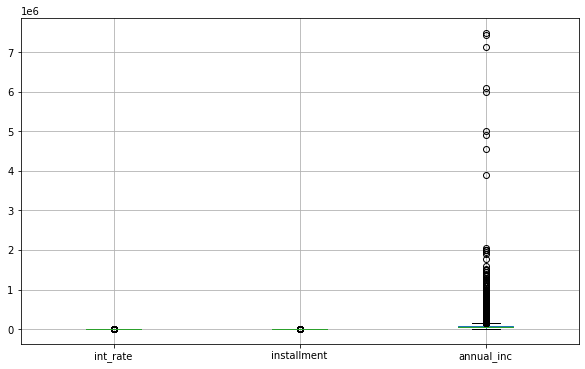

In [48]:
loan_dat[['int_rate','installment', 'annual_inc']].boxplot(figsize=(10,6))

<AxesSubplot:xlabel='int_rate'>

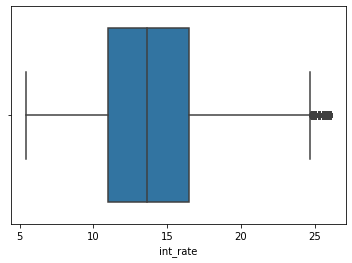

In [49]:
sns.boxplot('int_rate',data=loan_dat)

<AxesSubplot:xlabel='installment'>

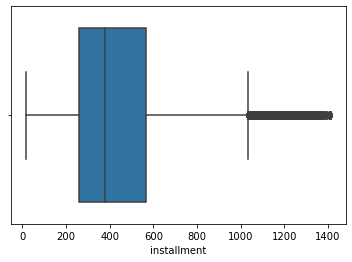

In [50]:
sns.boxplot('installment',data=loan_dat)

<AxesSubplot:xlabel='annual_inc'>

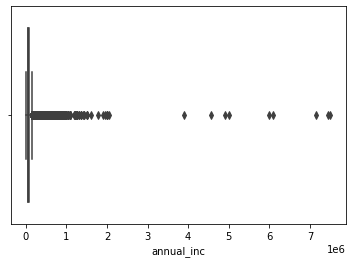

In [51]:
sns.boxplot('annual_inc',data=loan_dat)

<AxesSubplot:>

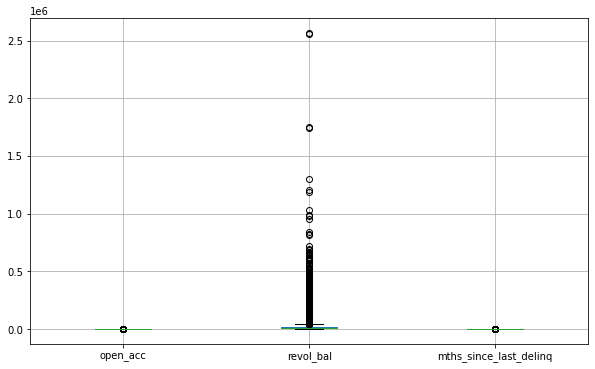

In [52]:
loan_dat[['open_acc','revol_bal','mths_since_last_delinq']].boxplot(figsize=(10,6))

<AxesSubplot:xlabel='revol_bal'>

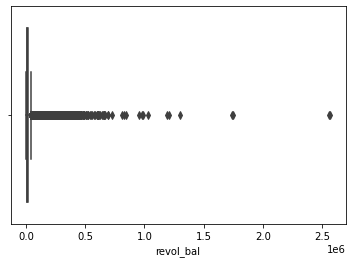

In [53]:
sns.boxplot('revol_bal',data=loan_dat)

<AxesSubplot:xlabel='term', ylabel='count'>

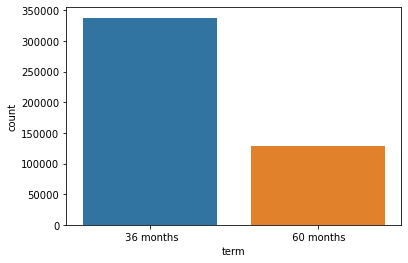

In [54]:
sns.countplot(loan_dat['term'])

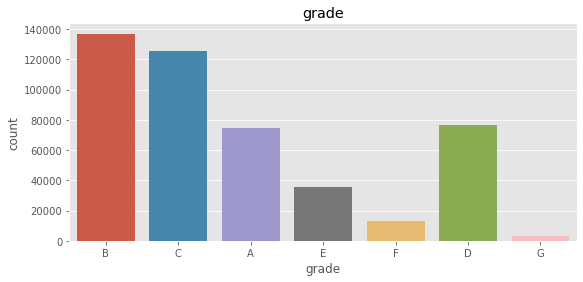

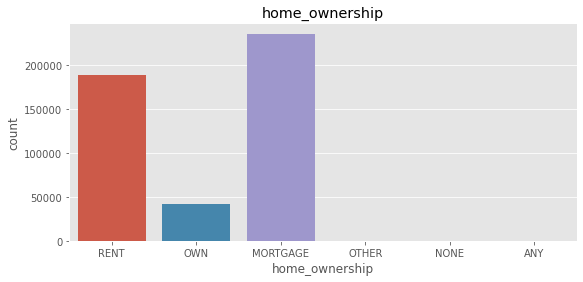

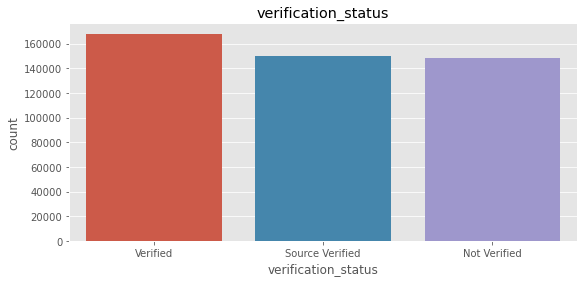

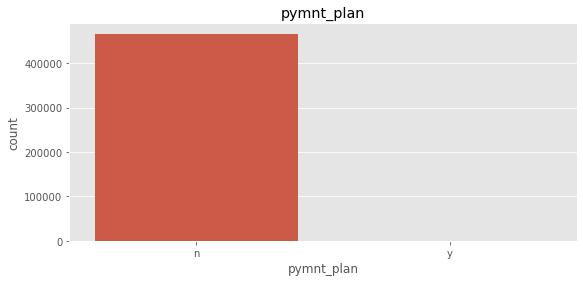

In [55]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ['grade','home_ownership','verification_status',
 'pymnt_plan']:
 plt.figure(figsize=(20,4))
 plt.subplot(121)
 sns.countplot(loan_dat[column])
 plt.title(column)


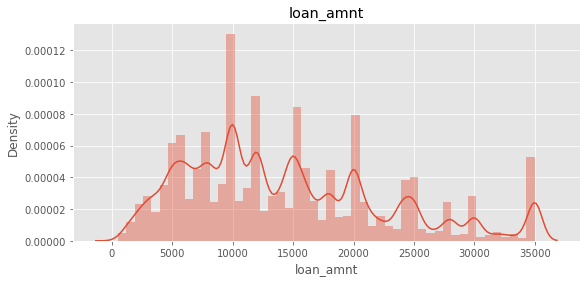

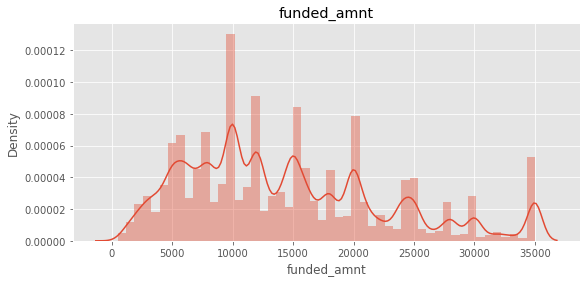

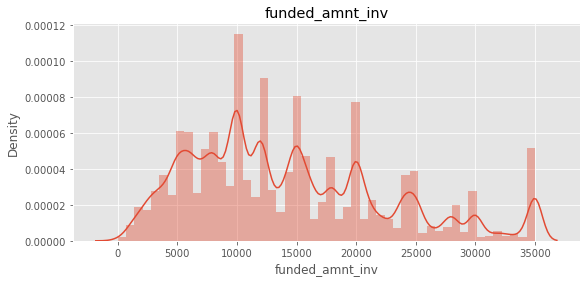

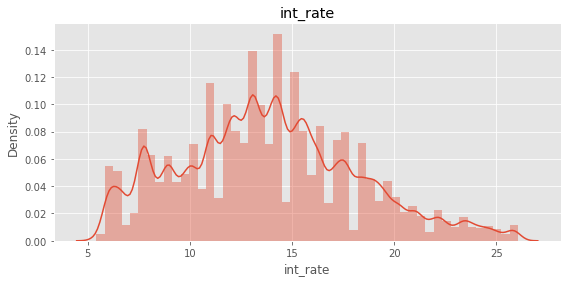

In [56]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate'] :
 plt.figure(figsize=(20,4))
 plt.subplot(121)
 sns.distplot(loan_dat[column], kde=True)
 plt.title(column)


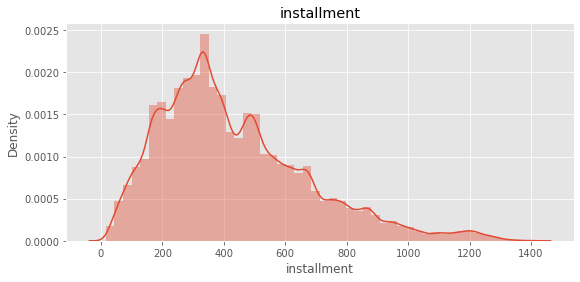

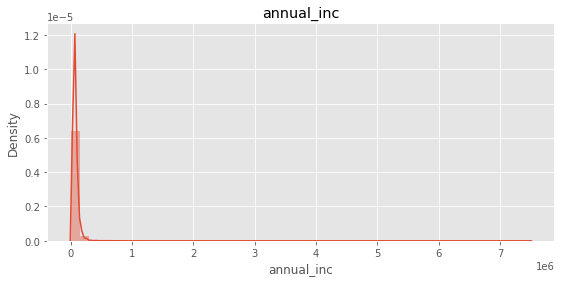

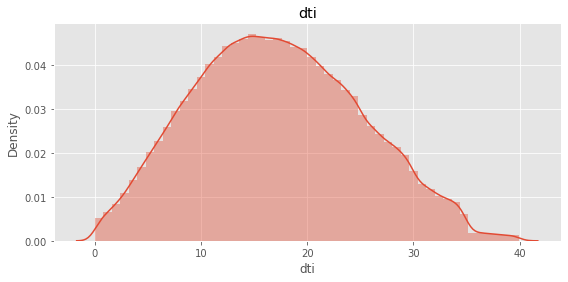

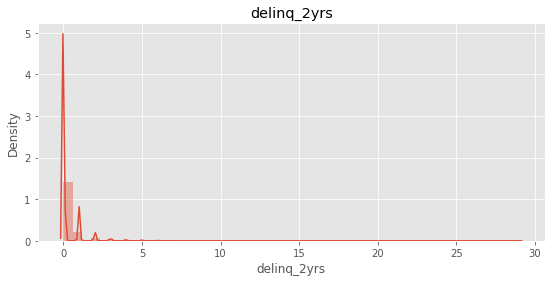

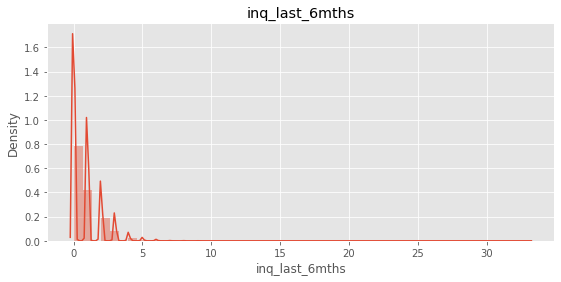

In [57]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ['installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths'] :
 plt.figure(figsize=(20,4))
 plt.subplot(121)
 sns.distplot(loan_dat[column], kde=True)
 plt.title(column)


#### int_rate

In [58]:
q1 = np.quantile(loan_dat["int_rate"],0.25)
q2 = np.quantile(loan_dat["int_rate"],0.50)
q3 = np.quantile(loan_dat["int_rate"],0.75)

iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr 
lower_tail = q1 - 1.5 * iqr
print(upper_tail,lower_tail)
loan_dat.loc[(df["int_rate"] < lower_tail) | (loan_dat["int_rate"] > upper_tail)].head(1)  # outliers detected in int_rate column

24.739999999999995 2.7400000000000038


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42655,19425,19425,19425.0,60 months,25.89,580.33,G,5 years,RENT,55000.0,...,580.33,Dec-15,0.0,71.0,1,INDIVIDUAL,0.0,80.0,38879.0,19800.0


<AxesSubplot:xlabel='int_rate'>

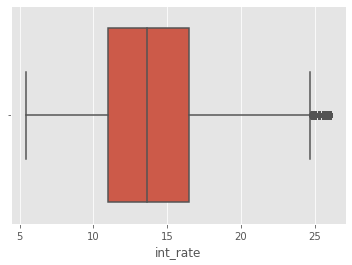

In [59]:
sns.boxplot('int_rate',data=loan_dat)

In [60]:
mean = loan_dat.loc[(loan_dat["int_rate"] > lower_tail) & (loan_dat["int_rate"] < upper_tail),"int_rate"].mean()
mean

13.705260901572764

In [61]:
loan_dat["int_rate"] = np.where(loan_dat["int_rate"] >upper_tail,mean,loan_dat["int_rate"])

<AxesSubplot:>

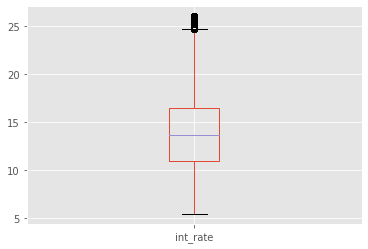

In [62]:
df[["int_rate"]].boxplot()

<AxesSubplot:xlabel='int_rate'>

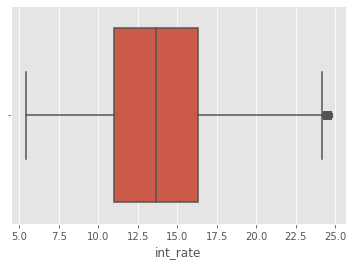

In [63]:
sns.boxplot('int_rate',data=loan_dat)

#### installment

In [64]:
q1 = np.quantile(loan_dat["installment"],0.25)
q2 = np.quantile(loan_dat["installment"],0.50)
q3 = np.quantile(loan_dat["installment"],0.75)

iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr 
lower_tail = q1 - 1.5 * iqr
print(upper_tail,lower_tail)
loan_dat.loc[(loan_dat["installment"] < lower_tail) | (loan_dat["installment"] > upper_tail)].head(1)  # outliers detected in int_rate column

1031.415 -208.14500000000004


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
128,35000,35000,35000.0,36 months,8.9,1111.37,A,6 years,MORTGAGE,125000.0,...,1123.85,Dec-14,0.0,45.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0


<AxesSubplot:xlabel='installment'>

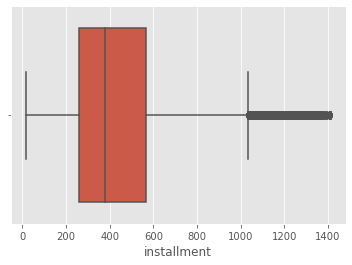

In [65]:
sns.boxplot('installment',data=loan_dat)

In [66]:
mean = loan_dat.loc[(loan_dat["installment"] > lower_tail) & (loan_dat["installment"] < upper_tail),"installment"].mean()
mean

413.2036921380958

In [67]:
loan_dat["installment"] = np.where(loan_dat["installment"] >upper_tail,mean,loan_dat["installment"])

<AxesSubplot:xlabel='installment'>

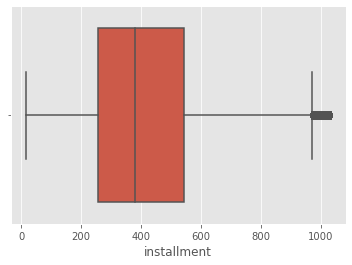

In [68]:
sns.boxplot('installment',data=loan_dat)

#### annual_inc

<AxesSubplot:xlabel='annual_inc'>

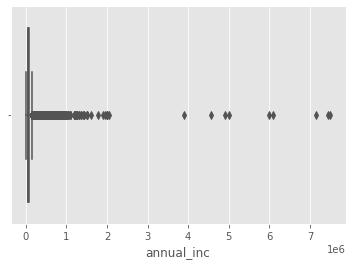

In [69]:
sns.boxplot('annual_inc',data=df)

In [70]:
q1 = np.quantile(loan_dat["annual_inc"],0.25)
q2 = np.quantile(loan_dat["annual_inc"],0.50)
q3 = np.quantile(loan_dat["annual_inc"],0.75)

iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr 
lower_tail = q1 - 1.5 * iqr
print(upper_tail,lower_tail)
loan_dat.loc[(loan_dat["annual_inc"] < lower_tail) | (loan_dat["annual_inc"] > upper_tail)].head(1)  # outliers detected in int_rate column

154882.5 -20929.5


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
170,25000,25000,25000.0,36 months,12.42,835.39,B,2 years,RENT,225000.0,...,842.08,Dec-14,0.0,45.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0


In [71]:
mean = loan_dat.loc[(loan_dat["annual_inc"] > lower_tail) & (loan_dat["annual_inc"] < upper_tail),"annual_inc"].mean()
mean

66434.52924999868

In [72]:
loan_dat["annual_inc"] = np.where(loan_dat["annual_inc"] >upper_tail,mean,loan_dat["annual_inc"])

<AxesSubplot:xlabel='annual_inc'>

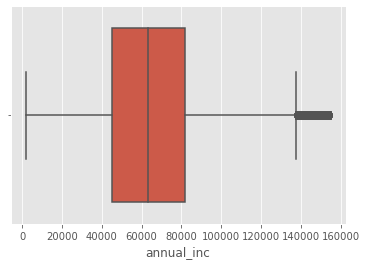

In [73]:
sns.boxplot('annual_inc',data=loan_dat)

### Normalizind Data

In [74]:
scaler = StanderScaler()

nor_data = scaler.fit_transform(loan_dat)

NameError: name 'StanderScaler' is not defined

### Analysing the Target Variable

In [75]:
loan_dat['loan_status'].value_counts(normalize=True)


Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [76]:
# creatin a new binary target variable
loan_dat['good_bad']=np.where(loan_dat['loan_status'].isin(['Charged Off','Late (31-120 days)','In Grace Period','Does not meet the credit policy. Status:Fully Paid', 
 'Late (16-30 days)','Default','Does not meet the credit policy. Status:Charged Off']),0,1)

In [77]:
#dropping the 'loan_status' variable
loan_dat.drop('loan_status',axis=1,inplace=True)

In [78]:
loan_dat['good_bad'].value_counts()

1    408965
0     57320
Name: good_bad, dtype: int64

In [106]:
loan_dat['emp_length']=df['emp_length']

### Splitting the data 

In [107]:
x=loan_dat.drop('good_bad',axis=1)
y=loan_dat['good_bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train_1,x_test_1=x_train.copy(),x_test.copy()

In [111]:
x_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 370960 to 449804
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    373028 non-null  int64  
 1   funded_amnt                  373028 non-null  int64  
 2   funded_amnt_inv              373028 non-null  float64
 3   term                         373028 non-null  object 
 4   int_rate                     373028 non-null  float64
 5   installment                  373028 non-null  float64
 6   grade                        373028 non-null  object 
 7   emp_length                   356260 non-null  object 
 8   home_ownership               373028 non-null  object 
 9   annual_inc                   373028 non-null  float64
 10  verification_status          373028 non-null  object 
 11  issue_d                      373028 non-null  object 
 12  pymnt_plan                   373028 non-null  object 

### Encoding

In [102]:
loan_dat['emp_length']=df['emp_length']

In [112]:
x_train_1['emp_length'].unique()

array(['1 year', '< 1 year', '10+ years', '5 years', '3 years', nan,
       '9 years', '2 years', '8 years', '4 years', '7 years', '6 years'],
      dtype=object)

In [113]:
mapping_dict={"10+ years":10,"9 years":9,"4 years":4,"5 years":5,"6 years":6,"7 years":7,"2 years":2,"1 year":1,"< 1 year":0.5,"3 years":3,"8 years":8}

x_train_1['emp_length']=loan_dat['emp_length'].map(mapping_dict)

In [114]:
x_train_1['emp_length'].unique()

array([ 1. ,  0.5, 10. ,  5. ,  3. ,  9. ,  2. ,  8. ,  4. ,  7. ,  6. ])

#### term


In [115]:
def term_converter(df,column):
 #removing redundant substrings
 df[column]=df[column].str.replace(' months','')
 df[column]=df[column].str.replace(' ','')
 
 #converting to numeric
 df[column]=pd.to_numeric(df[column])
#calling the function
term_converter(x_train_1,'term')
#confirming the transformation
x_train_1['term'].unique()

array([60, 36], dtype=int64)

### dealing with date features

In [116]:
x_train_1['earliest_cr_line'].unique() 

array(['Dec-01', 'Feb-00', 'Jan-99', 'Jun-02', 'Mar-89', 'Mar-96',
       'Jul-05', 'Jan-90', 'Sep-09', 'Aug-96', 'Aug-93', 'Dec-95',
       'Sep-96', 'Feb-82', 'Jun-09', 'Sep-97', 'Aug-00', 'Jan-00',
       'Sep-01', 'Mar-01', 'Apr-98', 'Jul-01', 'Oct-89', 'Jun-98',
       'Sep-05', 'Feb-90', 'Apr-01', 'Apr-88', 'Oct-99', 'Nov-91',
       'Jan-91', 'Dec-08', 'Sep-06', 'Apr-08', 'Mar-91', 'Aug-06',
       'Nov-93', 'Mar-95', 'Dec-06', 'Oct-01', 'Dec-99', 'Sep-00',
       'Sep-04', 'Dec-80', 'Sep-02', 'Dec-76', 'Jun-94', 'May-01',
       'Oct-05', 'Mar-00', 'Aug-01', 'Dec-90', 'Sep-95', 'May-04',
       'Apr-05', 'Dec-96', 'Mar-93', 'Feb-96', 'Nov-97', 'Feb-87',
       'Dec-98', 'Jun-82', 'Jun-06', 'Feb-88', 'Sep-98', 'Apr-06',
       'Sep-99', 'Feb-93', 'Jan-06', 'Jan-95', 'Oct-00', 'Mar-92',
       'Jul-98', 'Jan-88', 'Dec-89', 'Dec-93', 'Jan-07', 'Oct-06',
       'Aug-95', 'May-94', 'Oct-02', 'Feb-85', 'May-98', 'May-02',
       'Sep-94', 'Apr-92', 'Nov-01', 'Nov-69', 'Feb-01', 'Sep-

In [ ]:
# transformimg the dates to standard datetime format and adding a new column with differ
# the current date and the given date
def date_columns(df,column):
 #storing the current date
 today_date=pd.to_datetime('2023-11-07')
 
 #converting the date columns to standard datetime
 df[column]=pd.to_datetime(df[column],format='%b-%y')
 
 #calculating the difference and creating a new feature
 df['months_since_' + column]=round((pd.to_numeric((today_date-df[column])/np.timedel
 
 #removing any possible negative values by replacing them with the max value
 df['months_since_' + column]=df['months_since_' + column].apply(lambda x: df['months_
#calling the function
date_columns(x_train_1,'earliest_cr_line')
date_columns(x_train_1,'last_pymnt_d')
date_columns(x_train_1,'last_credit_pull_d')
date_columns(x_train_1,'issue_d')
drop the earlier date columns
x_train_1.drop(['earliest_cr_line','last_pymnt_d','last_credit_pull_d','issue_d'],axis=1)

#checking the new columns
print(x_train_1['months_since_earliest_cr_line'].describe())
print(x_train_1['months_since_last_pymnt_d'].describe())
print(x_train_1['months_since_last_credit_pull_d'].describe())
print(x_train_1['months_since_issue_d'].describe())
